[View in Colaboratory](https://colab.research.google.com/github/ucalyptus/Spotify-Recommendation-Engine/blob/master/Spotify_Recommendation_System_.ipynb)

In [1]:
!pip install spotipy

Client ID

Client Secret

Redirect URI https://developer.spotify.com/dashboard/applications/

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

In [3]:
cid = '17181be507204e99b7f64215f7892958'
secret = 'a4109cb325c547aa9691d89f7756b9c6'
username = '1291299030'
redirect_uri = 'https://developer.spotify.com/dashboard/applications/17181be507204e99b7f64215f7892958'


In [4]:
scope = 'user-library-read playlist-modify-public playlist-read-private'

client_credentials_manager = SpotifyClientCredentials(client_id = cid, client_secret=secret)

sp = spotipy.Spotify(client_credentials_manager= client_credentials_manager)

token = util.prompt_for_user_token(username,scope,cid,secret,redirect_uri)

if token:
  sp = spotipy.Spotify(auth=token)
  
else:
  print("Can't get token for", username)

In [5]:
import pandas as pd

#https://open.spotify.com/playlist
sourcePlaylistID = ''
sourcePlaylist = sp.user_playlist(username,sourcePlaylistID);
tracks = sourcePlaylist["tracks"];
songs = tracks["items"];

track_ids = []
track_names = []


for i in range(0, len(songs)):
  if songs[i]['track']['id']!=None:
    track_ids.append(songs[i]['track']['id'])
    track_names.append(songs[i]['track']['name'])
    
features = []


for i in range(0,len(track_ids)):
  audio_features  = sp.audio_features(track_ids[i])
  for track in audio_features:
    features.append(track)
    
    
playlist_df = pd.DataFrame(features,index = track_names)

In [6]:
#francocasadei@yahoo.it:astrolabio

In [7]:
playlist_df = playlist_df[["id", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness",  "key", "liveness", "loudness", "mode", "speechiness", "tempo", "valence"]]

In [8]:
playlist_df.shape

(100, 13)

In [19]:
playlist_df['ratings']=[10, 9, 9, 10, 8, 6, 8, 4, 3, 5, 7, 5, 5, 10, 9, 9, 10, 8, 6, 8, 4, 3, 5, 7, 5, 5, 10, 9, 9, 10, 8, 6, 8, 4, 3, 5, 7, 5, 5, 10, 9, 9, 10, 8, 6, 8, 4, 3, 5, 7, 5, 5, 10, 9, 9, 10, 8, 6, 8, 4, 3, 5, 7, 5, 5, 10, 9, 9, 10, 8, 6, 8, 4, 3, 5, 7, 5, 5, 10, 9, 9, 10, 8, 6, 8, 4, 3, 5, 7, 5, 5, 10, 8, 6, 8, 4, 3, 5, 7, 5]

In [20]:
playlist_df

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,ratings
Just Us,04amRUbvDaUMmE9U4Vs48E,0.1940,0.748,162945,0.581,0.000000,7,0.0982,-4.541,1,0.0663,108.932,0.3300,10
Dreams,4j5zq53Fyu84lmY6UYO8yW,0.0277,0.501,215177,0.916,0.344000,8,0.1070,-4.463,1,0.0379,145.001,0.3900,9
Paradise,7njKgVl3AnLflRad38o7AG,0.0828,0.844,169038,0.644,0.000000,11,0.1130,-6.273,0,0.0479,122.061,0.5910,9
All I Got,1iaTDu4PCIWQQOwwwqq5qW,0.1580,0.326,315724,0.578,0.004790,2,0.5750,-6.786,1,0.0455,144.731,0.1020,10
Summer Days (feat. Macklemore & Patrick Stump of Fall Out Boy),7Feaw9WAEREY0DUOSXJLOM,0.1790,0.661,163805,0.723,0.000012,5,0.1400,-6.976,0,0.0566,113.778,0.3160,8
Rush Over Me,6BDLcvvtyJD2vnXRDi1IjQ,0.0701,0.441,259556,0.753,0.000000,0,0.0270,-4.074,1,0.0440,135.015,0.2540,6
Crawl Outta Love,0q7oMII7kWTj1ZSX6GT6LU,0.1810,0.377,242012,0.723,0.000000,7,0.0815,-2.951,1,0.0460,84.139,0.1670,8
No Guidance (feat. Drake),7FEwp8BavoEVE3AnxJDchc,0.1230,0.698,260640,0.454,0.000000,1,0.1550,-6.756,0,0.1510,92.932,0.1370,4
Where'd U Go,2oL0HIuo0cxIycDtJWbpuN,0.0299,0.463,184556,0.638,0.000032,2,0.0876,-4.370,1,0.0693,186.095,0.2780,3
Here With Me,5icOoE6VgqFKohjWWNp0Ac,0.0623,0.791,156347,0.565,0.000000,5,0.1560,-3.933,0,0.0439,99.961,0.1810,5


In [21]:
X_train = playlist_df.drop(['id', 'ratings'], axis=1)
y_train = playlist_df['ratings']

J:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
J:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


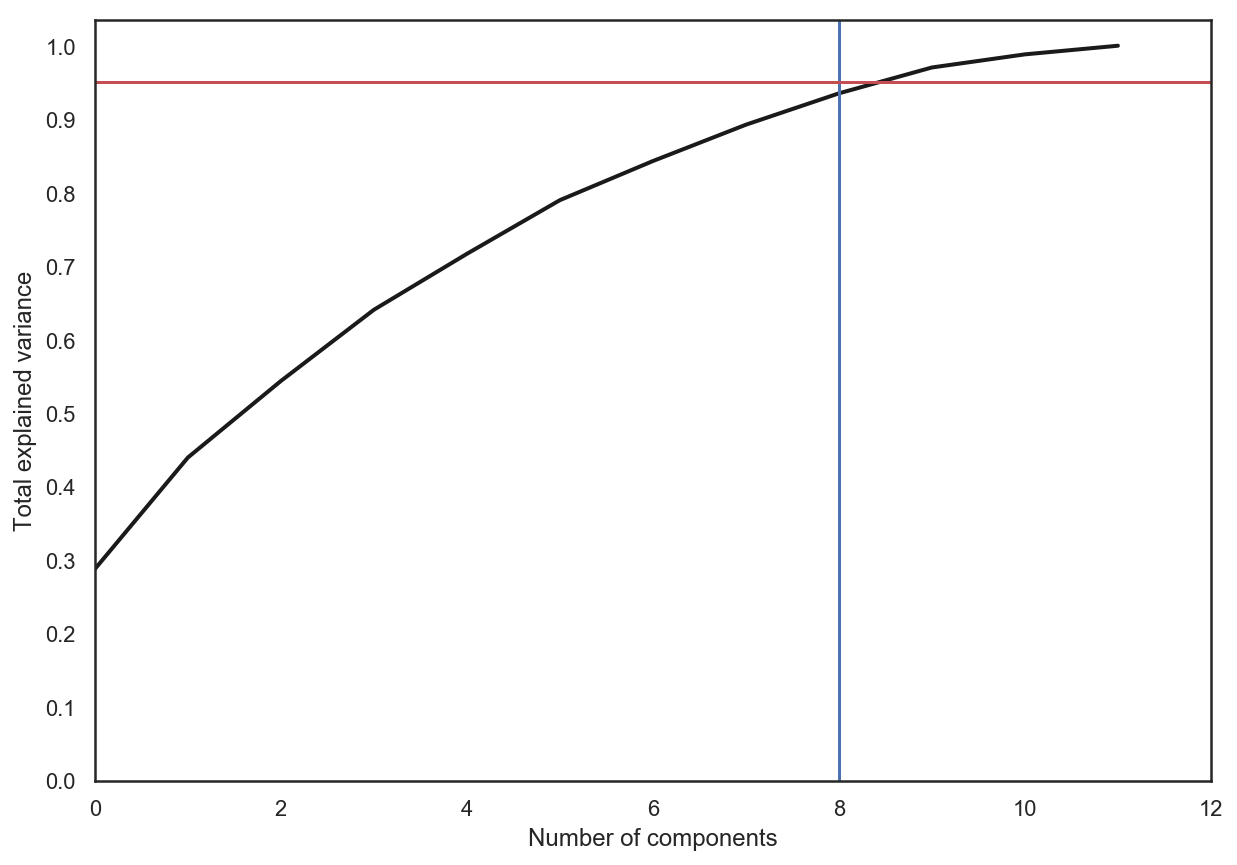

In [22]:
import numpy as np
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

X_scaled = StandardScaler().fit_transform(X_train)

pca = decomposition.PCA().fit(X_scaled)


plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='k',lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0,12)
plt.yticks(np.arange(0,1.1,0.1))
plt.axvline(8,c='b')
plt.axhline(0.95,c='r')
plt.show();

In [23]:
# Fit your dataset to the optimal pca
pca = decomposition.PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(sublinear_tf = True, ngram_range=(1,6),
                   max_features=10000)
X_names_sparse=v.fit_transform(track_names)
X_names_sparse.shape

(100, 622)

In [25]:
from scipy.sparse import csr_matrix, hstack

X_train_last = csr_matrix(hstack([X_pca, X_names_sparse]))

In [26]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

skf = StratifiedKFold(n_splits=2,shuffle=True,random_state=42)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn_params = {'n_neighbors':range(1,10)}
knn = KNeighborsClassifier(n_jobs=-1)

knn_grid= GridSearchCV(knn,knn_params,cv=skf,n_jobs =-1,verbose=True)
knn_grid.fit(X_train_last,y_train)
knn_grid.best_params_, knn_grid.best_score_

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  18 | elapsed:    2.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.1s finished
J:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


({'n_neighbors': 7}, 0.2)

In [28]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'max_features':[4,7,8,10],'min_samples_leaf':[1,3,5,8],'max_depth':[3,5,8]}
rfc = RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1,oob_score=True)
forest_grid = GridSearchCV(rfc,parameters,n_jobs=-1,cv=skf,verbose=1)
forest_grid.fit(X_train_last,y_train)
forest_grid.best_estimator_ , forest_grid.best_score_

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    3.2s finished


(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=3, max_features=4, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
             oob_score=True, random_state=42, verbose=0, warm_start=False),
 0.23)

In [29]:
from sklearn.tree import DecisionTreeClassifier

tree= DecisionTreeClassifier()

tree_params = {'max_depth':range(1,11),'max_features':range(4,19)}
tree_grid = GridSearchCV(tree,tree_params,cv=skf,n_jobs=-1,verbose=True)
tree_grid.fit(X_train_last,y_train)
tree_grid.best_estimator_ , tree_grid.best_score_

Fitting 2 folds for each of 150 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
J:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
             max_features=16, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'), 0.25)

In [39]:
rec_tracks=[]

for i in playlist_df['id'].values.tolist():
  rec_tracks += sp.recommendations(seed_tracks=[i],limit = int(len(playlist_df)/2))['tracks'];
  

rec_track_ids=[]
rec_track_names = []
for i in rec_tracks:
  rec_track_ids.append(i['id'])
  rec_track_names.append(i['name'])
  

rec_features=[]

for i in range(0,len(rec_track_ids)):
  rec_audio_features = sp.audio_features(rec_track_ids[i])
  for track in rec_audio_features:
    rec_features.append(track)
    
    
rec_playlist_df= pd.DataFrame(rec_features,index = rec_track_ids)

In [33]:
rec_playlist_df = rec_playlist_df[["acousticness", "danceability", "duration_ms", "energy", "instrumentalness",  "key", "liveness", "loudness", "mode", "speechiness", "tempo", "valence"]]

In [34]:
tree_grid.best_estimator_.fit(X_train_last,y_train)
rec_playlist_df_scaled = StandardScaler().fit_transform(rec_playlist_df)
X_test_pca  = pca.transform(rec_playlist_df_scaled)
X_test_names = v.transform(rec_track_names)
X_test_last = csr_matrix(hstack([X_test_pca,X_test_names]))
y_pred_class = tree_grid.best_estimator_.predict(X_test_last)

J:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
J:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [35]:
rec_playlist_df['ratings']=y_pred_class
rec_playlist_df = rec_playlist_df.sort_values('ratings',ascending=False)
rec_playlist_df = rec_playlist_df.reset_index()

recs_to_add = rec_playlist_df[rec_playlist_df['ratings']>=9]['index'].values.tolist()

In [36]:
playlist_recs =sp.user_playlist_create(username,name='PCA + tf-idf + DT - Recommended Songs for Playlist - {}'.format(sourcePlaylist['name']))

In [37]:
playlist_recs

{'collaborative': False,
 'description': '',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/2K8PLztipMvKmg0ez4Mzym'},
 'followers': {'href': None, 'total': 0},
 'href': 'https://api.spotify.com/v1/playlists/2K8PLztipMvKmg0ez4Mzym',
 'id': '2K8PLztipMvKmg0ez4Mzym',
 'images': [],
 'name': 'PCA + tf-idf + DT - Recommended Songs for Playlist - Your Top Songs 2019',
 'owner': {'display_name': '',
  'external_urls': {'spotify': 'https://open.spotify.com/user/1291299030'},
  'href': 'https://api.spotify.com/v1/users/1291299030',
  'id': '1291299030',
  'type': 'user',
  'uri': 'spotify:user:1291299030'},
 'primary_color': None,
 'public': True,
 'snapshot_id': 'MSwwZTRlZDQ4ZmVjZGJmMjgxNDY3MTU4NDJiZWEyMjE5YjBkZDQ5Mzg5',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/2K8PLztipMvKmg0ez4Mzym/tracks',
  'items': [],
  'limit': 100,
  'next': None,
  'offset': 0,
  'previous': None,
  'total': 0},
 'type': 'playlist',
 'uri': 'spotify:playlist:2K8PLztipMvKmg0ez4Mzym'}

In [38]:
print(recs_to_add)
#sp.user_playlist_add_tracks(username,playlist_recs['id'],recs_to_add);

[]
